# Tutorial 1: Introduction to Machine Learning for Imaging

From the class Machine Learning for Imaging taught at Imperial College Spring 2021

## Downloading the data

In [1]:
! wget https://www.doc.ic.ac.uk/~bglocker/teaching/notebooks/supervised-data.zip
! unzip supervised-data.zip

--2021-01-25 09:20:22--  https://www.doc.ic.ac.uk/~bglocker/teaching/notebooks/supervised-data.zip
Resolving www.doc.ic.ac.uk (www.doc.ic.ac.uk)... 146.169.13.6
Connecting to www.doc.ic.ac.uk (www.doc.ic.ac.uk)|146.169.13.6|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3167357 (3.0M) [application/zip]
Saving to: ‘supervised-data.zip’

supervised-data.zip 100%[===================>]   3.02M  4.47MB/s    in 0.7s    

2021-01-25 09:20:23 (4.47 MB/s) - ‘supervised-data.zip’ saved [3167357/3167357]

Archive:  supervised-data.zip
   creating: data/
   creating: data/mnist/
  inflating: data/mnist/README-original.txt  
  inflating: data/mnist/t10k-morpho.csv  
  inflating: data/mnist/train-morpho.csv  


## Setting data directory

In [2]:
# data directory
# data_dir = '/vol/lab/course/416/data/mnist/' #DoC lab machines
data_dir = 'data/mnist/' #local data

## Image classification with Python

In this tutorial, we will learn basics of image IO and simple processing, and visualisation in Python. 
If you want to refresh your python basics, please check this [tutorial](http://cs231n.github.io/python-numpy-tutorial/) from the computer vision course at Stanford.

By the end of the tutorial, you should be able to:
1. Use python, numpy, and run jupyter notebook
2. Build a simple binary classifier 
3. Implement a logistic regression classifier using numpy

---
### Import stuff and set up some helper functions

In [3]:
# import common libraries
import numpy as np

# adjust settings to plot nice figures inline
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

In [4]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

#########################################################
# functions to plot digits
#########################################################

def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = matplotlib.cm.gray,
               interpolation="nearest")
    plt.colorbar()
    # plt.axis("off")


def plot_digits(data, n_samples_row=10):
    images = [image.reshape(28,28) for image in data]
    n_rows = (len(images) - 1) // n_samples_row + 1
    # append empty images if the last row is not complete
    empty_images = n_rows * n_samples_row - len(data)
    images.append(np.zeros((28, 28 * empty_images)))
    # draw row by row
    images_row = []
    for current_row in range(n_rows):
        tmp_row_images = images[current_row * n_samples_row : (current_row + 1) * n_samples_row]
        images_row.append(np.concatenate(tmp_row_images, axis=1))
    # draw all in one image
    image = np.concatenate(images_row, axis=0)
    plt.figure(figsize=(n_samples_row,n_rows))
    plt.imshow(image, cmap = matplotlib.cm.gray)
    plt.colorbar()
    # plt.axis("off")


---

## MNIST digit recognition

In a real ML task, data would be available in a database and organised in tables, documents or files. In this tutorial, we will be using the [MNIST dataset](http://yann.lecun.com/exdb/mnist/), small images of digits handwritten by high school students and employees of the US Census Bureau. It consists of a training set of 60,000 examples, and a test set of 10,000 examples. Each image is size-normalized and centered in a fixed-size image 28x28 pixels, and labeled with the digit it represents. It is kind of the *hello world* of machine learning for imaging. You can find more benchmark datasets [here](https://pytorch.org/docs/stable/torchvision/datasets.html)


Extracting data/mnist/MNIST/raw/train-images-idx3-ubyte.gz to data/mnist/MNIST/raw


Extracting data/mnist/MNIST/raw/train-labels-idx1-ubyte.gz to data/mnist/MNIST/raw



Extracting data/mnist/MNIST/raw/t10k-images-idx3-ubyte.gz to data/mnist/MNIST/raw


Extracting data/mnist/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/mnist/MNIST/raw
Processing...
Done!


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:480: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


Train data:
shape (images, x,y) = (60000, 28, 28)
labels = [0 1 2 3 4 5 6 7 8 9]
Test data:
shape (images, x,y) = (10000, 28, 28)
labels = [0 1 2 3 4 5 6 7 8 9]





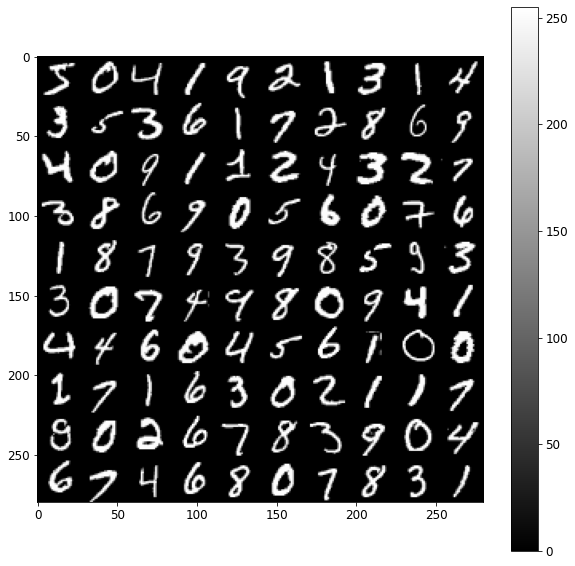

In [5]:
import torchvision.datasets as dset

# train data
train_set = dset.MNIST(root=data_dir, train=True, download=True)
train_data = np.array(train_set.data)
train_labels = np.array(train_set.targets)

# test data
test_set = dset.MNIST(root=data_dir, train=False, download=True)
test_data = np.array(test_set.data)
test_labels = np.array(test_set.targets)\

# print train and test data details
print('Train data:')
print('shape (images, x,y) = {}'.format(train_data.shape))
print('labels = {}'.format(np.unique(train_labels)))

print('Test data:')
print('shape (images, x,y) = {}'.format(test_data.shape))
print('labels = {}'.format(np.unique(test_labels)))


# plot sample digits
plot_digits(train_set.data[:100])
plt.show()

---
Here, we will sort our data and fix the random seed to ensure geting same results everytime you run the experiments. Then plot some sampled digits after sorting the data.

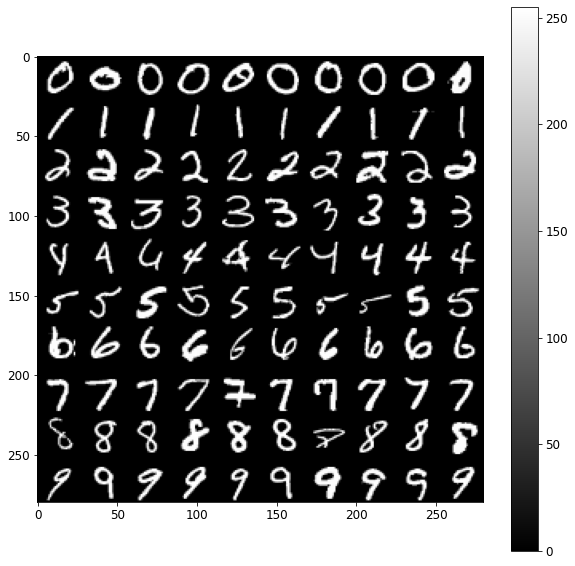

In [6]:
# we will sort our data and fix the random generator seed to get similar results from different runs
np.random.seed(42)

# sort dataset
def sort_data(data, labels):
        sorted_idxs = np.array(sorted([(target, i) for i, target in enumerate(labels)]))[:, 1]
        return data[sorted_idxs], labels[sorted_idxs]

############################################################################
# Q: use the previous function to sort both training and testing data
############################################################################

#INSERT CODE HERE
train_data, train_labels = sort_data(train_data, train_labels)
test_data, test_labels = sort_data(test_data, test_labels)
############################################################################

# plot sampled images from sorted data
# here it samples 20 samples of [0,1], 30 samples of [2,3,4], and 50 samples of [5,6,7,8,9] - 10 samples for each digit
example_images = np.r_[train_data[:12000:600], train_data[13000:30600:600], train_data[30600:60000:590]]
plot_digits(example_images)
plt.show()

---
### Simple Binary Classifier

Now our data are cleaned and sorted, we will train a simple binary classifier to distinguish between two selected digits. 

Data usually is divided into three sets for training, validation, and testing. The training data is used to train the model's parameters, while the validation set is used to adjust the model's hyperparameters. Finally, the performance of the trained model is evaluated on the testing data. For this tutorial we will split the data into train and test for simplification. 

**Task**

1. Extract ones and eights from both training and testing data
2. Shuffle training data
3. Plot number of images versus number of 'white' pixels per image
4. Can you predict the label based only on the number of 'white' pixels? What's the training and testing error for such an approach?

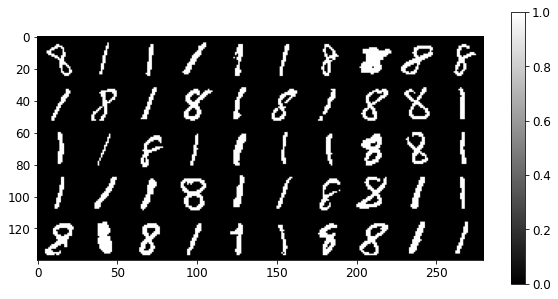

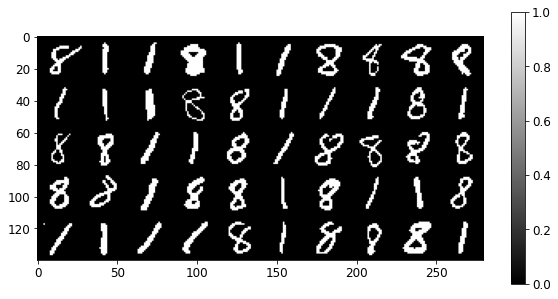

In [8]:
############################################################################
# Extract sample digits of ones and eights
############################################################################

def sample_data_digits(data, labels, labels_to_select):
    # convert input 3d arrays to 2d arrays
    nsamples, nx, ny = data.shape
    data_vec = np.reshape(data,(nsamples,nx*ny))
   
    selected_indexes = np.isin(labels, labels_to_select)
    selected_data = data_vec[selected_indexes]
    selected_labels = labels[selected_indexes]
    
    # Convert images from gray to binary by thresholding intensity values
    selected_data = 1.0 * (selected_data >= 128)

    # convert labels to binary: digit_0=False, digit_1=True
    selected_labels = selected_labels==labels_to_select[1]
    
    # shuffle data
    shuffle_index = np.random.permutation(len(selected_labels))
    selected_data, selected_labels = selected_data[shuffle_index], selected_labels[shuffle_index]

    return selected_data, selected_labels


############################################################################
# Q: extract ones and eights digits from both training and testing data 
############################################################################

#INSERT CODE HERE
selected_train_data, selected_train_labels = sample_data_digits(train_data, train_labels, [1,8])
selected_test_data, selected_test_labels = sample_data_digits(test_data, test_labels, [1,8])
############################################################################

# plot sampled digits
plot_digits(selected_train_data[0:50])
plt.show()
plot_digits(selected_train_data[8000:8050])
plt.show()

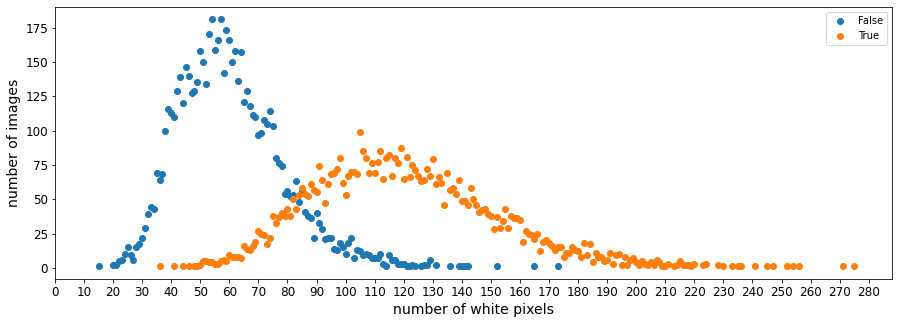

In [68]:
############################################################################
# Q:plot number of images versus number of 'white' foreground pixels 
# for both 1s and 8s classes.
############################################################################

#INSERT CODE HERE
from collections import Counter

def plot_num_white_pixels(data:np.array,binary_labels):
    '''Args: data = (m,n) array of m digits
    
    For each digit array, its values are binary.
    Here we count the 1s and plot the result
    for all data points '''

    plt.figure(figsize=(15,5))
    for x in np.unique(binary_labels):
        # select class
        idx = (binary_labels == x)
        # count pixels and create bins
        bin_count = Counter(np.sort(data[idx].sum(axis=1)))
        num_white_pixels = list(bin_count.keys())
        num_images = list(bin_count.values())
        plt.scatter(num_white_pixels, num_images, label=f'{x}')
    plt.xticks(np.arange(0,285,10))
    plt.xlabel('number of white pixels')
    plt.ylabel('number of images')
    plt.legend()
    plt.show()

plot_num_white_pixels(selected_train_data, selected_train_labels)

In [58]:
############################################################################
# Q: select threshold value to sperate between the two classes
############################################################################

#INSERT CODE HERE
threshold = 85

In [55]:
############################################################################
# Q: classify digits using a threshold 
############################################################################

#INSERT CODE HERE
def predict(data:np.array, threshold:int) -> np.array:

    # count white pixels and compare to threshold
    return data.sum(axis=1) > threshold

In [66]:
############################################################################
# Q: calculate both training and testing accuracy
# You should get accuracies around 89-90%
############################################################################

train_acc = (predict(selected_train_data, threshold) == selected_train_labels).sum()/len(selected_train_labels)
print('Train accuracy = {:.3f}%'.format(train_acc))

test_acc = (predict(selected_test_data,threshold) == selected_test_labels).sum() / len(selected_test_labels)
print('Test accuracy = {:.3f}%'.format(test_acc))

Train accuracy = 0.895%
Test accuracy = 0.905%


---
**Task**

Repeat the previous examples to classify digits 0s and 8s instead of 1s and 8s. Will the threshold binary classifier differentiate between the two categories based on number of 'white' pixels?

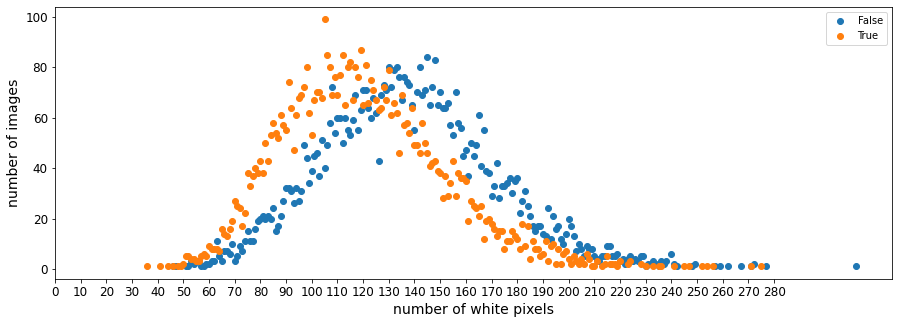

In [69]:
############################################################################
# Q: extract zeros and eights digits from both training and testing data
############################################################################

#INSERT CODE HERE
selected_train_data_2, selected_train_labels_2 = sample_data_digits(train_data, train_labels, [0,8])
selected_test_data_2, selected_test_labels_2 = sample_data_digits(test_data, test_labels, [0,8])
############################################################
# Q: plot number of images versus number of pixels
############################################################

#INSERT CODE HERE
plot_num_white_pixels(selected_train_data_2, selected_train_labels_2)

In [71]:
############################################################################
# Q: select threshold value to sperate between the two classes
############################################################################

#INSERT CODE HERE
threshold_2 = 125
############################################################################
# Q: classify digits using a threshold 
############################################################################

#INSERT CODE HERE

In [72]:
train_acc = (predict(selected_train_data_2, threshold_2) == selected_train_labels_2).sum()/len(selected_train_labels_2)
print('Train accuracy = {:.2f}%'.format(train_acc))

test_acc = (predict(selected_test_data_2,threshold_2) == selected_test_labels_2).sum() / len(selected_test_labels_2)
print('Test accuracy = {:.2f}%'.format(test_acc))

Train accuracy = 0.38%
Test accuracy = 0.41%


---
## Logistic Regression using Numpy

In the previous example, we used a simple threshold to classify each image of a digit using one feature (number of 'white' pixels).

Here, we will use a logistic regression model for the same task but using raw pixel information as input features. The logistic regression function is defined as: $h_{\Theta}(\mathbf{x}) =  \frac{1}{1 + \exp(- \Theta^{\top} \mathbf{x})}$.

It's useful to group all training samples into one big matrix $\mathbf{X}$ of size *(number_samples x number_features)*, and their labels into one vector $\mathbf{y}$ as in the code below.

Training our model is a loop that includes three main steps
1. Evaluate the cost function $J(\Theta)$
2. Compute partial derivatives
3. Update the model paramteters

---

**Task**

1. Complete the logistic regression class below 
2. Train a logistic regression model on the data from the previous example
3. Compute train and test accuracies, and compare with the previous results
4. Plot the trained parameters and comment on the figure

In [151]:
class LogisticRegression:
    def __init__(self, lr=0.05, num_iter=1000, add_bias=True, verbose=True):
        self.lr = lr
        self.verbose = verbose
        self.num_iter = num_iter
        self.add_bias = add_bias
        # self.theta = np.random.normal(loc=0, scale=0.01, size=X.shape[1])
    
    def __add_bias(self, X):
        bias = np.ones((X.shape[0], 1))
        return np.concatenate((bias, X), axis=1)
    

    def __loss(self, h, y):
        ''' computes loss values '''
        y = np.array(y,dtype=float)
        ############################################################################
        # Q: compute the loss 
        ############################################################################
        return np.mean(-1*y*np.log(h) - (1-y)*np.log(1-h))

    
    def fit(self, X, y):
        ''' 
        Optimise our model using gradient descent
        Arguments:
            X input features
            y labels from training data
            
        '''
        if self.add_bias:
            X = self.__add_bias(X)
        
        ############################################################################
        # Q: initialise weights randomly with normal distribution N(0,0.01)
        ############################################################################
        self.theta = np.random.normal(loc=0, scale=0.01, size=X.shape[1])
        # print(self.theta)
        
        for i in range(self.num_iter):
            ############################################################################
            # Q: forward propagation
            ############################################################################
            z = X.dot(self.theta)
            h = 1 / (1 + np.exp(-z))
            ############################################################################
            # Q: backward propagation
            ############################################################################
            gradient = (h - y).dot(X) / len(y)
            # update parameters
            self.theta -= self.lr * gradient
            ############################################################################
            # Q: print loss
            ############################################################################
            if(self.verbose == True and i % 50 == 0):
                print('loss: {} \t'.format(self.__loss(h, y)))
    
    def predict_probs(self,X):
        ''' returns output probabilities
        '''
        ############################################################################
        # Q: forward propagation
        ############################################################################
        if self.add_bias:
            X = self.__add_bias(X)
        z = X.dot(self.theta)
        return 1 / (1 + np.exp(-z))

    def predict(self, X, threshold=0.5):
        ''' returns output classes
        '''
        return self.predict_probs(X) >= threshold


In [152]:
LR = LogisticRegression(verbose=True)
LR.fit(selected_train_data, selected_train_labels)

loss: 0.7024126239554863 	
loss: 0.18284011962148236 	
loss: 0.1371107996969497 	
loss: 0.11780912954638456 	
loss: 0.10668898070238131 	
loss: 0.09930539766512358 	
loss: 0.09397864003356286 	
loss: 0.0899177868265271 	
loss: 0.086696696655372 	
loss: 0.08406370520077652 	
loss: 0.08185991763038382 	
loss: 0.07997975780226772 	
loss: 0.07835018382842042 	
loss: 0.07691897242689782 	
loss: 0.07564774886329599 	
loss: 0.07450765290099212 	
loss: 0.07347654258986368 	
loss: 0.07253713286016138 	
loss: 0.07167572257023713 	
loss: 0.07088130331214157 	


In [160]:
y_train_probs = LR.predict_probs(selected_train_data)
y_train_probs

array([0.92248111, 0.02618537, 0.00679573, ..., 0.012583  , 0.01621781,
       0.99994251])

In [162]:
y_train_pred = LR.predict(selected_train_data)
y_train_pred

array([ True, False, False, ..., False, False,  True])

In [ ]:
#########################################################################
# Q: train our model
#########################################################################

#INSERT CODE HERE

In [167]:
#########################################################################
# Q: Evaluate the trained model - compute train and test accuracies
# You should get accuracies around 98-99%
#########################################################################
train_preds = LR.predict(selected_train_data)
logistic_train_acc = (train_preds == selected_train_labels).sum() / len(selected_train_labels)
print('Train accuracy = {:.2f}%'.format(logistic_train_acc))

test_preds = LR.predict(selected_test_data)
logistic_test_acc = (test_preds == selected_test_labels).sum() / len(selected_test_labels)
print('Test accuracy = {:.2f}%'.format(logistic_test_acc))

Train accuracy = 0.98%
Test accuracy = 0.99%


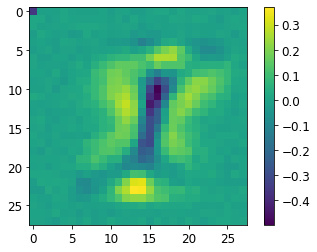

In [171]:
#########################################################################
# Plot trained model params (weights) as an image of size (28x28)
#########################################################################
plt.imshow(LR.theta[:-1].reshape(28,28))
plt.colorbar()
plt.show()

---
## Using explicit features for classification

We have now seen how we can build a digit classifier using the raw pixel information as features. In some ML applications, it is possible (or even desired) to hand engineer the feature extraction stage. Here, we are exploring how far we can get with morphometric features extracted for MNIST digits, namely the area, length, thickness, slant, width, height.

In [172]:
import os
import pandas as pd

# Reload MNIST
train_data = np.array(train_set.data)
train_labels = np.array(train_set.targets)

# test data
test_data = np.array(test_set.data)
test_labels = np.array(test_set.targets)

# Read the meta data using pandas
train_features = pd.read_csv(data_dir + 'train-morpho.csv')
test_features = pd.read_csv(data_dir + 't10k-morpho.csv')
train_features.head() # show the first five data entries of the training set

,index,area,length,thickness,slant,width,height
0,0,107.3125,50.266504,2.460658,0.231074,14.539572,19.849054
1,1,123.2500,51.198485,2.616601,0.331858,15.387810,19.341053
2,2,78.3750,45.927670,1.891592,-0.212196,20.479656,19.114880
3,3,67.3125,22.849242,2.919769,0.509185,5.358179,19.724599
4,4,91.1875,46.284271,2.247425,0.007590,13.275437,19.527523


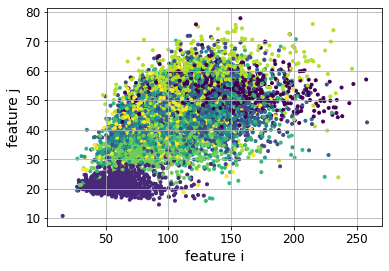

In [173]:
plt.scatter(test_features['area'],test_features['length'], marker='.', c=test_labels)
plt.grid()
plt.xlabel('feature i')
plt.ylabel('feature j')
plt.show()

In [174]:
# Reformat the data
X_train = np.transpose(np.array([train_features['area'].values,train_features['length'].values,train_features['thickness'].values,train_features['slant'].values,train_features['width'].values,train_features['height'].values]))
X_test = np.transpose(np.array([test_features['area'].values,test_features['length'].values,test_features['thickness'].values,test_features['slant'].values,test_features['width'].values,test_features['height'].values]))

In [175]:
def sample_data(data, labels, labels_to_select):
    selected_indexes = np.isin(labels, labels_to_select)
    selected_data = data[selected_indexes]
    selected_labels = labels[selected_indexes]

    # convert labels to binary: digit_0=False, digit_1=True
    selected_labels = selected_labels==labels_to_select[1]
    
    # shuffle data
    shuffle_index = np.random.permutation(len(selected_labels))
    selected_data, selected_labels = selected_data[shuffle_index], selected_labels[shuffle_index]

    return selected_data, selected_labels

Similar to above, let's pick data for a simple binary classification between two digits. Let's start with 0s and 8s.

In [179]:
labels_to_select = [0,8]
selected_train_data, selected_train_labels = sample_data(X_train,train_labels,labels_to_select)
selected_test_data, selected_test_labels = sample_data(X_test,test_labels,labels_to_select)

---
**Task**

This time we use a logistic regression model from [scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html).

Train the logistic regression on the data and calculate the classification accuracy for both training and testing.

In [180]:
from sklearn import linear_model

#########################################################################
# Q: Use scikit-learn's logistic regression model
#########################################################################

sklearn_lr = linear_model.LogisticRegression().fit(selected_train_data, selected_train_labels)

In [183]:
#########################################################################

logistic_train_acc = sklearn_lr.score(selected_train_data, selected_train_labels)
print('Train accuracy = {:.2f}%'.format(logistic_train_acc))

logistic_test_acc = sklearn_lr.score(selected_test_data, selected_test_labels)
print('Test accuracy = {:.2f}%'.format(logistic_test_acc))

Train accuracy = 0.89%
Test accuracy = 0.88%


---
***Bonus (optional)***

Extend all of the above to the full 10-class classification problem.
